Enter the weight of clothes8
Enter the speed of water20
62.5
gcnfg


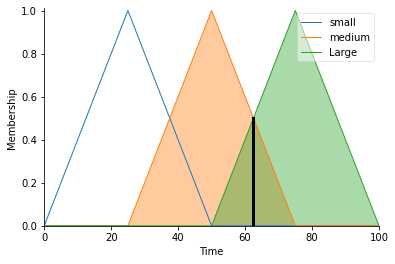

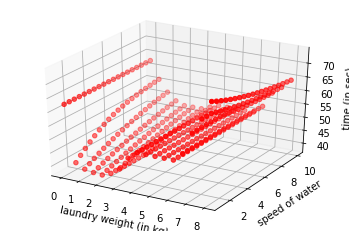

laundry weight : 20
dirt level : 15


Exception: Invalid value for laundry weight: 20.000000

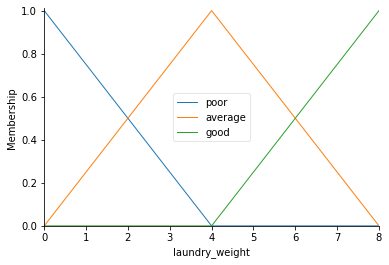

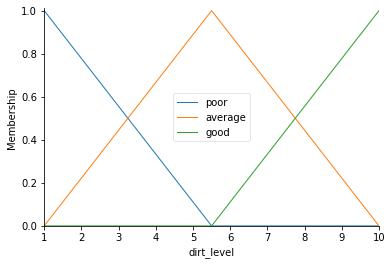

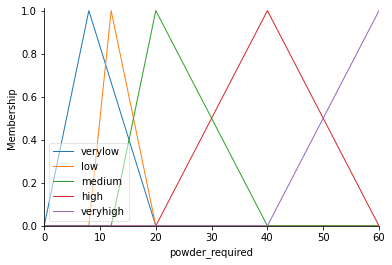

In [9]:
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt





# variables to hold values of washing time, clothes weight and stream of water
Weight =  ctrl.Antecedent(np.arange(0,11,1),'Weight')
Time = ctrl.Consequent(np.arange(0,101,1),'Time')
water = ctrl.Antecedent(np.arange(0,81,1),'water')





#dividing the variables values into 3 judging criteria
Weight['small'] = fuzz.trimf(Weight.universe,[0,2.5,5])
Weight['medium'] = fuzz.trimf(Weight.universe,[2.5,5,7.5])
Weight['Large'] = fuzz.trimf(Weight.universe,[5,7.5,10])





Time['small'] = fuzz.trimf(Time.universe,[0,25,50])
Time['medium'] = fuzz.trimf(Time.universe,[25,50,75])
Time['Large'] = fuzz.trimf(Time.universe,[50,75,100])
water['small'] = fuzz.trimf(water.universe,[0,20,40])
water['medium'] = fuzz.trimf(water.universe,[20,40,60])
water['Large'] = fuzz.trimf(water.universe,[40,60,80])




# creating rules 
rule1  = ctrl.Rule(Weight['small'] | water['small'],Time['medium'])
rule2  = ctrl.Rule(Weight['small'] | water['medium'], Time['small'])
rule3  = ctrl.Rule(Weight['small'] | water['Large'], Time['small'])
rule4  = ctrl.Rule(Weight['medium'] | water['small'], Time['Large'])
rule5  = ctrl.Rule(Weight['medium'] |  water['medium'], Time['medium'])
rule6  = ctrl.Rule(Weight['medium'] | water['Large'], Time['small'])
rule7  = ctrl.Rule(Weight['Large'] | water['small'], Time['Large'])
rule8  = ctrl.Rule(Weight['Large'] | water['medium'], Time['Large'])
rule9  = ctrl.Rule(Weight['Large'] | water['Large'], Time['Large'])





#using rules to create the function that will make decision using the rules
washing_Time = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
time = ctrl.ControlSystemSimulation(washing_Time)





#taking inputs
time.input['Weight'] = float(input("Enter the weight of clothes"))
time.input['water']=float(input("Enter the speed of water"))
time.compute() #performing operation on the basis of rules & defuzification
print(time.output['Time']) #output
Time.view(sim=time)





z = []
x = []
y = []
laundry_wei = np.arange(0.0,8.5,0.5)
dirt_lvl = np.arange(1.0,10.5,0.5)
for i in laundry_wei:
    for j in dirt_lvl:
        x.append(i)
        y.append(j)
        time.input['Weight'] = i
        time.input['water']=j
        time.compute() #performing operation on the basis of rules & defuzification
        z.append(time.output['Time']) #output
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='r', marker='o')
print("gcnfg")
ax.set_xlabel('laundry weight (in kg)')
ax.set_ylabel(' speed of water')
ax.set_zlabel('time (in sec)')

plt.show()





class washing_machine:
    laundry_weight = ctrl.Antecedent(np.arange(0.0,8.5,0.5), 'laundry_weight')
    dirt_level = ctrl.Antecedent(np.arange(1.0,10.5,0.5), 'dirt_level')
    powder_required = ctrl.Consequent(np.arange(0,61, 1), 'powder_required')
  
    laundry_weight.automf(3)
    dirt_level.automf(3)
  
    powder_required['verylow'] = fuzz.trimf(powder_required.universe, [0, 8, 20])
    powder_required['low'] = fuzz.trimf(powder_required.universe, [8, 12, 20])
    powder_required['medium'] = fuzz.trimf(powder_required.universe, [12, 20, 40])
    powder_required['high'] = fuzz.trimf(powder_required.universe, [20, 40, 60])
    powder_required['veryhigh'] = fuzz.trimf(powder_required.universe, [40, 60, 60])

    laundry_weight.view()
    dirt_level.view()
    powder_required.view()

    rule1 = ctrl.Rule(laundry_weight['poor'] | dirt_level['poor'], powder_required['verylow'])
    rule2 = ctrl.Rule(laundry_weight['average'] | dirt_level['poor'], powder_required['low'])
    rule3 = ctrl.Rule(laundry_weight['good'] | dirt_level['poor'], powder_required['medium'])
    rule4 = ctrl.Rule(laundry_weight['poor'] | dirt_level['average'], powder_required['medium'])
    rule5 = ctrl.Rule(laundry_weight['average'] | dirt_level['average'], powder_required['medium'])
    rule6 = ctrl.Rule(laundry_weight['good'] | dirt_level['average'], powder_required['high'])
    rule7 = ctrl.Rule(laundry_weight['poor'] | dirt_level['good'], powder_required['high'])
    rule8 = ctrl.Rule(laundry_weight['average'] | dirt_level['good'], powder_required['high'])
    rule9 = ctrl.Rule(laundry_weight['good'] | dirt_level['good'], powder_required['veryhigh'])

    #rule1.view()

    washing_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
    washing = ctrl.ControlSystemSimulation(washing_ctrl)





def fuzzify_laundry(fuzz_laundry_weight,fuzz_dirt_level):
    washing_machine.washing.input['laundry_weight'] = fuzz_laundry_weight
    washing_machine.washing.input['dirt_level'] = fuzz_dirt_level
    washing_machine.washing.compute()
#  washing_machine.powder_required.view(sim = washing_machine.washing)
    return washing_machine.washing.output['powder_required']




def compute_washing_parameters(total_laundry_weight,level_of_dirt):
    if total_laundry_weight < 0.0 or total_laundry_weight > 8.0:
        raise Exception("Invalid value for laundry weight: %lf" % total_laundry_weight)

    if level_of_dirt < 1.0 or level_of_dirt > 10.0:
        raise Exception("Invalid value for dirt level: %lf" % level_of_dirt)
    type_fuzz = fuzzify_laundry(total_laundry_weight,level_of_dirt)
  
    print("fuzzifying laundary: ",type_fuzz)




def plot_graph():
    laundry_wei = np.arange(0.0,8.5,0.5)
    dirt_lvl = np.arange(1.0,10.5,0.5)
    x = []
    y = []
    z = []
    for i in laundry_wei:
        for j in dirt_lvl:
            x.append(i)
            y.append(j)
            z.append(fuzzify_laundry(i,j))
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
  
    ax.scatter(x, y, z, c='r', marker='o')

    ax.set_xlabel('laundry weight (in kg)')
    ax.set_ylabel('dirt level')
    ax.set_zlabel('powder required')

    plt.show()




if __name__=="__main__":
    laundry_weight = float(input("laundry weight : "))
    dirt_level = float(input("dirt level : "))
    washing_parameters = compute_washing_parameters(laundry_weight,dirt_level)
    plot_graph()


FileNotFoundError: [Errno 2] No such file or directory: 'chatbot.txt'